# Graduate Admission Prediction using Artificial Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(400, 9)

## Data Preprocessing

### Seeing for null or duplicated values

In [4]:
print(df.duplicated().sum()) # Duplicated values
print(df.isnull().sum()) # Null values

0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Dropping Non-Important columns

In [6]:
df = df.drop(columns=['Serial No.'])

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Splitting dataset into training and testing dataset

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
X_train.shape

(320, 7)

In [13]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
41,316,105,2,2.5,2.5,8.20,1
180,300,104,3,3.5,3.0,8.16,0
132,309,105,5,3.5,3.5,8.56,0


In [14]:
y_train

93     0.44
23     0.95
299    0.71
13     0.62
90     0.64
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Chance of Admit , Length: 320, dtype: float64

In [15]:
y_test.shape

(80,)

## Min-Max Scaling (data has tight upper and lower bound)

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()
X_train = min_max_sc.fit_transform(X_train)
X_test = min_max_sc.transform(X_test)

In [ ]:
X_train

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

## Building Neural Network

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(49, activation='relu'))
model.add(Dense(1, activation='linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 49)                392       
                                                                 
 dense_2 (Dense)             (None, 1)                 50        
                                                                 
Total params: 498
Trainable params: 498
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [22]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 1s 3ms/step - loss: 0.7922
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5171
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3150
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1680
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 11/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 12/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 13/200
10/10 [=================

In [23]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 0s/step


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'R2 score : {r2_score(y_test, y_pred)}')
print(f'MSE score : {mean_squared_error(y_test, y_pred)}')

R2 score : 0.8095363815002868
MSE score : 0.004404935432875959


## Visualizing Loss and Accuracy over each epoch

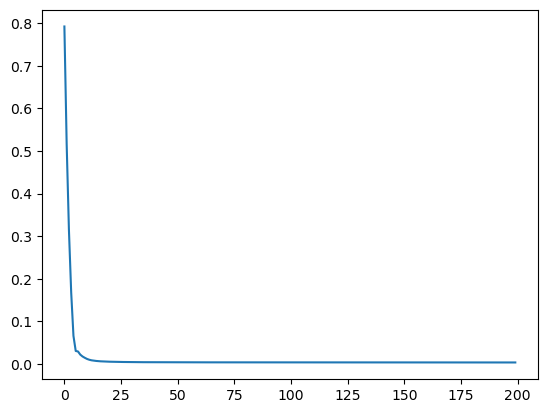

In [25]:
plt.plot(history.history['loss'])

## Save and Deploy Neural Network Model

In [35]:
model.save('GAP_model.h5')